In [113]:
#import libraries and packages
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [114]:
#import data and select feature list
insta = pd.read_excel("Instagram_dataset.xlsx", sheet_name='Sheet1')
insta=insta[['followers','likes','views','comments','estimated impact anna']]

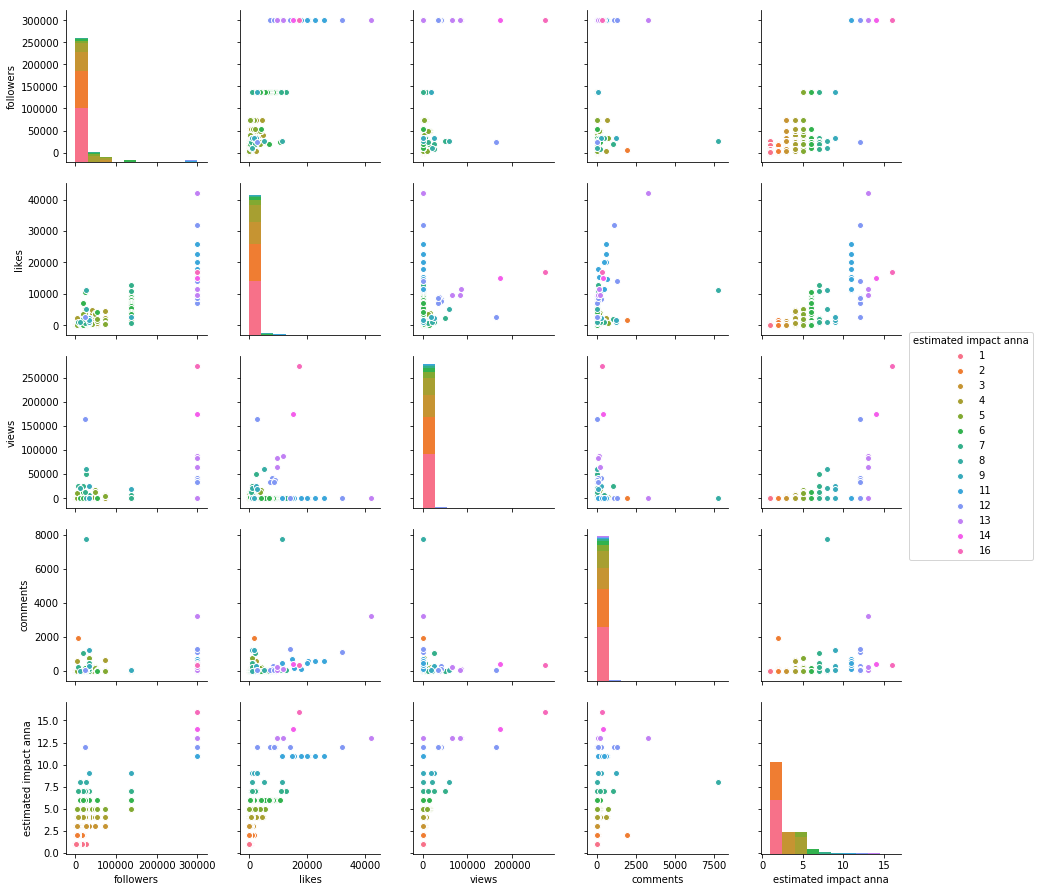

In [115]:
#create pairplot of the feature variables
sns.pairplot(insta, hue='estimated impact anna')

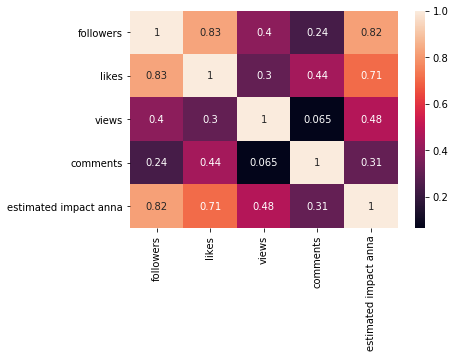

In [116]:
#create correlation plot
sns.heatmap(insta.corr(), annot = True)

In [117]:
#feature engineering
insta[['views']] = np.nan_to_num(insta[['views']])
X = insta.drop('estimated impact anna', axis=1)
X = X.apply(preprocessing.scale, axis=0)
y = insta['estimated impact anna'].values
y_cat = to_categorical(y)

C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

In [118]:
#NN Model
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state= 123)

In [ ]:
#--------------------------------------------Grid Search Hyperparameters Tuning --------------------------------------------------#
#Epoch tuning
def create_model():
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model)

epochs = [500, 1000, 1500, 3000]
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #1000

#Optimizer tuning
def create_model(optimizer='adam'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, epochs = 1500)

optimizer = ['SGD', 'RMSprop','Adam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #Adam

#Learning Rate, Momentum tuning
def create_model(learn_rate=0.001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    optimizer = Adam(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=2000)
learn_rate = [0.00001, 0.0001, 0.001, 0.01]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.001

#Weight Initialization tuning
def create_model(init_mode='uniform'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(200, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
init_mode = ['uniform', 'glorot_normal', 'normal', 'zero']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #normal
    
    
#Activation Function Tuning
def create_model(activation='relu'):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation=activation))
    model.add(Dense(200, kernel_initializer='normal', activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
activation = ['softplus', 'relu', 'tanh', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #tanh
    
 
#Regularization penalty Tuning
from keras import regularizers
def create_model(beta=0.0001):
    model  = Sequential ()
    model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(200, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(beta)))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)

beta = [0.0001, 0.001, 0.01]
param_grid = dict(beta=beta)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #0.0001

#Number of hidden Units tuning
def create_model(neurons=101):
    model  = Sequential ()
    model.add(Dense(neurons, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(neurons-100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(17, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=1000)
# define the grid search parameters
neurons = [150, 200, 300]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=10)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #150

In [119]:
#--------------------------------------------Final Modeling--------------------------------------------------#

model  = Sequential ()
model.add(Dense(200, input_shape=(4,), kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(200, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(100, kernel_initializer='normal', activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])
#Fit
history=model.fit(X_train, y_train, epochs=1000, verbose=2)
result=model.evaluate(X_test,y_test)

Epoch 1/1000
 - 1s - loss: 2.0460 - acc: 0.4034
Epoch 2/1000
 - 0s - loss: 1.2488 - acc: 0.5472
Epoch 3/1000
 - 0s - loss: 1.0312 - acc: 0.6663
Epoch 4/1000
 - 0s - loss: 0.9679 - acc: 0.6760
Epoch 5/1000
 - 0s - loss: 0.9267 - acc: 0.6910
Epoch 6/1000
 - 0s - loss: 0.9092 - acc: 0.6921
Epoch 7/1000
 - 0s - loss: 0.8955 - acc: 0.6942
Epoch 8/1000
 - 0s - loss: 0.8781 - acc: 0.7082
Epoch 9/1000
 - 0s - loss: 0.8689 - acc: 0.7006
Epoch 10/1000
 - 0s - loss: 0.8510 - acc: 0.7178
Epoch 11/1000
 - 0s - loss: 0.8362 - acc: 0.7307
Epoch 12/1000
 - 0s - loss: 0.8265 - acc: 0.7479
Epoch 13/1000
 - 0s - loss: 0.8508 - acc: 0.7167
Epoch 14/1000
 - 0s - loss: 0.8140 - acc: 0.7328
Epoch 15/1000
 - 0s - loss: 0.8233 - acc: 0.7200
Epoch 16/1000
 - 0s - loss: 0.8144 - acc: 0.7393
Epoch 17/1000
 - 0s - loss: 0.7943 - acc: 0.7339
Epoch 18/1000
 - 0s - loss: 0.7820 - acc: 0.7554
Epoch 19/1000
 - 0s - loss: 0.7903 - acc: 0.7446
Epoch 20/1000
 - 0s - loss: 0.7950 - acc: 0.7307
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.4565 - acc: 0.8594
Epoch 168/1000
 - 0s - loss: 0.4642 - acc: 0.8552
Epoch 169/1000
 - 0s - loss: 0.4587 - acc: 0.8541
Epoch 170/1000
 - 0s - loss: 0.4588 - acc: 0.8519
Epoch 171/1000
 - 0s - loss: 0.4537 - acc: 0.8552
Epoch 172/1000
 - 0s - loss: 0.4576 - acc: 0.8670
Epoch 173/1000
 - 0s - loss: 0.4478 - acc: 0.8637
Epoch 174/1000
 - 0s - loss: 0.4421 - acc: 0.8734
Epoch 175/1000
 - 0s - loss: 0.4540 - acc: 0.8584
Epoch 176/1000
 - 0s - loss: 0.4569 - acc: 0.8594
Epoch 177/1000
 - 0s - loss: 0.4446 - acc: 0.8637
Epoch 178/1000
 - 0s - loss: 0.4412 - acc: 0.8680
Epoch 179/1000
 - 0s - loss: 0.4402 - acc: 0.8659
Epoch 180/1000
 - 0s - loss: 0.4436 - acc: 0.8519
Epoch 181/1000
 - 0s - loss: 0.4468 - acc: 0.8616
Epoch 182/1000
 - 0s - loss: 0.4616 - acc: 0.8616
Epoch 183/1000
 - 0s - loss: 0.4559 - acc: 0.8498
Epoch 184/1000
 - 0s - loss: 0.4632 - acc: 0.8498
Epoch 185/1000
 - 0s - loss: 0.4393 - acc: 0.8509
Epoch 186/1000
 - 0s - loss: 0.4436 - acc: 0.8670
Epoch 187/1000


 - 0s - loss: 0.3476 - acc: 0.9088
Epoch 332/1000
 - 0s - loss: 0.3736 - acc: 0.9034
Epoch 333/1000
 - 0s - loss: 0.3640 - acc: 0.9056
Epoch 334/1000
 - 0s - loss: 0.3884 - acc: 0.8970
Epoch 335/1000
 - 0s - loss: 0.3717 - acc: 0.8981
Epoch 336/1000
 - 0s - loss: 0.3514 - acc: 0.9077
Epoch 337/1000
 - 0s - loss: 0.3441 - acc: 0.9109
Epoch 338/1000
 - 0s - loss: 0.3433 - acc: 0.9099
Epoch 339/1000
 - 0s - loss: 0.3429 - acc: 0.9131
Epoch 340/1000
 - 0s - loss: 0.3476 - acc: 0.9099
Epoch 341/1000
 - 0s - loss: 0.3587 - acc: 0.9013
Epoch 342/1000
 - 0s - loss: 0.3431 - acc: 0.9099
Epoch 343/1000
 - 0s - loss: 0.3594 - acc: 0.9045
Epoch 344/1000
 - 0s - loss: 0.3743 - acc: 0.8948
Epoch 345/1000
 - 0s - loss: 0.3596 - acc: 0.9067
Epoch 346/1000
 - 0s - loss: 0.3483 - acc: 0.9088
Epoch 347/1000
 - 0s - loss: 0.3557 - acc: 0.8981
Epoch 348/1000
 - 0s - loss: 0.3325 - acc: 0.9185
Epoch 349/1000
 - 0s - loss: 0.3413 - acc: 0.9152
Epoch 350/1000
 - 0s - loss: 0.3467 - acc: 0.9109
Epoch 351/1000


 - 0s - loss: 0.3149 - acc: 0.9142
Epoch 496/1000
 - 0s - loss: 0.2846 - acc: 0.9313
Epoch 497/1000
 - 0s - loss: 0.3020 - acc: 0.9195
Epoch 498/1000
 - 0s - loss: 0.2861 - acc: 0.9313
Epoch 499/1000
 - 0s - loss: 0.3120 - acc: 0.9120
Epoch 500/1000
 - 0s - loss: 0.3293 - acc: 0.9152
Epoch 501/1000
 - 0s - loss: 0.3161 - acc: 0.9152
Epoch 502/1000
 - 0s - loss: 0.2942 - acc: 0.9249
Epoch 503/1000
 - 0s - loss: 0.3326 - acc: 0.9002
Epoch 504/1000
 - 0s - loss: 0.2939 - acc: 0.9227
Epoch 505/1000
 - 0s - loss: 0.2822 - acc: 0.9303
Epoch 506/1000
 - 0s - loss: 0.3026 - acc: 0.9174
Epoch 507/1000
 - 0s - loss: 0.3130 - acc: 0.9163
Epoch 508/1000
 - 0s - loss: 0.2970 - acc: 0.9281
Epoch 509/1000
 - 0s - loss: 0.2991 - acc: 0.9217
Epoch 510/1000
 - 0s - loss: 0.2864 - acc: 0.9217
Epoch 511/1000
 - 0s - loss: 0.2876 - acc: 0.9270
Epoch 512/1000
 - 0s - loss: 0.2768 - acc: 0.9324
Epoch 513/1000
 - 0s - loss: 0.2772 - acc: 0.9345
Epoch 514/1000
 - 0s - loss: 0.2991 - acc: 0.9174
Epoch 515/1000


 - 0s - loss: 0.2515 - acc: 0.9378
Epoch 660/1000
 - 0s - loss: 0.2724 - acc: 0.9345
Epoch 661/1000
 - 0s - loss: 0.2880 - acc: 0.9292
Epoch 662/1000
 - 0s - loss: 0.2645 - acc: 0.9335
Epoch 663/1000
 - 0s - loss: 0.2811 - acc: 0.9303
Epoch 664/1000
 - 0s - loss: 0.2630 - acc: 0.9378
Epoch 665/1000
 - 0s - loss: 0.2760 - acc: 0.9270
Epoch 666/1000
 - 0s - loss: 0.2738 - acc: 0.9335
Epoch 667/1000
 - 0s - loss: 0.2601 - acc: 0.9335
Epoch 668/1000
 - 0s - loss: 0.2534 - acc: 0.9399
Epoch 669/1000
 - 0s - loss: 0.2623 - acc: 0.9356
Epoch 670/1000
 - 0s - loss: 0.2748 - acc: 0.9281
Epoch 671/1000
 - 0s - loss: 0.2909 - acc: 0.9206
Epoch 672/1000
 - 0s - loss: 0.2740 - acc: 0.9238
Epoch 673/1000
 - 0s - loss: 0.2823 - acc: 0.9174
Epoch 674/1000
 - 0s - loss: 0.2544 - acc: 0.9345
Epoch 675/1000
 - 0s - loss: 0.2551 - acc: 0.9399
Epoch 676/1000
 - 0s - loss: 0.2520 - acc: 0.9388
Epoch 677/1000
 - 0s - loss: 0.2757 - acc: 0.9270
Epoch 678/1000
 - 0s - loss: 0.2554 - acc: 0.9313
Epoch 679/1000


 - 0s - loss: 0.2453 - acc: 0.9453
Epoch 824/1000
 - 0s - loss: 0.2377 - acc: 0.9442
Epoch 825/1000
 - 0s - loss: 0.2649 - acc: 0.9227
Epoch 826/1000
 - 0s - loss: 0.2551 - acc: 0.9335
Epoch 827/1000
 - 0s - loss: 0.2471 - acc: 0.9421
Epoch 828/1000
 - 0s - loss: 0.2841 - acc: 0.9163
Epoch 829/1000
 - 0s - loss: 0.2426 - acc: 0.9324
Epoch 830/1000
 - 0s - loss: 0.2391 - acc: 0.9431
Epoch 831/1000
 - 0s - loss: 0.2362 - acc: 0.9431
Epoch 832/1000
 - 0s - loss: 0.2263 - acc: 0.9474
Epoch 833/1000
 - 0s - loss: 0.2324 - acc: 0.9453
Epoch 834/1000
 - 0s - loss: 0.2331 - acc: 0.9453
Epoch 835/1000
 - 0s - loss: 0.2478 - acc: 0.9367
Epoch 836/1000
 - 0s - loss: 0.2302 - acc: 0.9485
Epoch 837/1000
 - 0s - loss: 0.2369 - acc: 0.9421
Epoch 838/1000
 - 0s - loss: 0.2366 - acc: 0.9453
Epoch 839/1000
 - 0s - loss: 0.2680 - acc: 0.9356
Epoch 840/1000
 - 0s - loss: 0.2709 - acc: 0.9281
Epoch 841/1000
 - 0s - loss: 0.2828 - acc: 0.9292
Epoch 842/1000
 - 0s - loss: 0.2922 - acc: 0.9217
Epoch 843/1000


 - 0s - loss: 0.2246 - acc: 0.9410
Epoch 988/1000
 - 0s - loss: 0.2370 - acc: 0.9335
Epoch 989/1000
 - 0s - loss: 0.2235 - acc: 0.9453
Epoch 990/1000
 - 0s - loss: 0.2279 - acc: 0.9453
Epoch 991/1000
 - 0s - loss: 0.2285 - acc: 0.9399
Epoch 992/1000
 - 0s - loss: 0.2382 - acc: 0.9367
Epoch 993/1000
 - 0s - loss: 0.2309 - acc: 0.9367
Epoch 994/1000
 - 0s - loss: 0.2202 - acc: 0.9506
Epoch 995/1000
 - 0s - loss: 0.2159 - acc: 0.9539
Epoch 996/1000
 - 0s - loss: 0.2486 - acc: 0.9335
Epoch 997/1000
 - 0s - loss: 0.2460 - acc: 0.9356
Epoch 998/1000
 - 0s - loss: 0.2242 - acc: 0.9453
Epoch 999/1000
 - 0s - loss: 0.2255 - acc: 0.9399
Epoch 1000/1000
 - 0s - loss: 0.2322 - acc: 0.9453
233/233 [==============================] - 0s 395us/step


In [120]:
#Results on Test data   
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_class, y_pred_class))

print(classification_report(y_test_class, y_pred_class))

cm=confusion_matrix(y_test_class, y_pred_class)

0.8798283261802575
             precision    recall  f1-score   support

          1       0.99      0.98      0.98        93
          2       0.83      0.95      0.89        61
          3       0.88      0.74      0.81        31
          4       0.83      0.77      0.80        26
          5       0.38      0.38      0.38         8
          6       0.83      0.83      0.83         6
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         1

avg / total       0.88      0.88      0.88       233



C:\Users\ntarz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


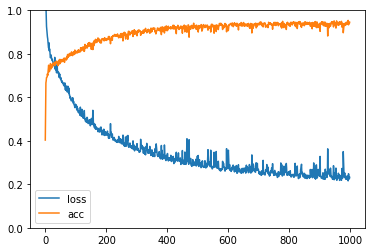

In [121]:
#Loss Accuracy
historydf=pd.DataFrame(history.history,index=history.epoch)
historydf.plot(ylim=(0,1))

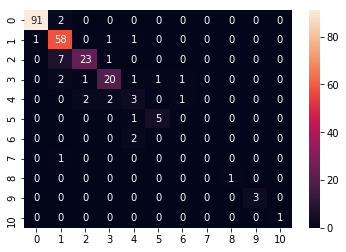

In [122]:
#confusion matrix
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test_class, y_pred_class))
sn.heatmap(df_cm, annot=True)

In [123]:
y_test_class2=list(y_test_class)

In [124]:
y_test_class2.sort()

In [125]:
from itertools import groupby
y_testtest=[len(list(group)) for key, group in groupby(y_test_class2)]

In [126]:
i=0
cm2=pd.DataFrame()
for j in range(len(y_testtest)):
       if y_testtest[j]>0:
            cm2[i]=cm[i]/y_testtest[j]
            i=i+1

cm_final=np.round(np.transpose(cm2),2)

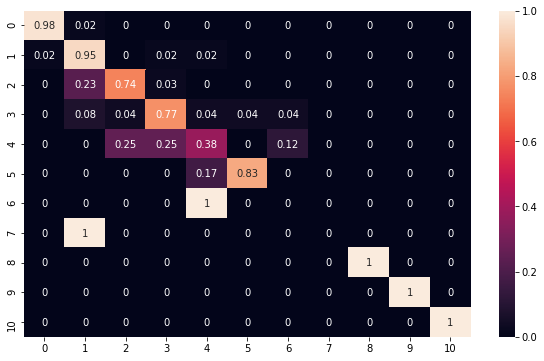

In [127]:
plt.subplots(figsize=(10,6))
sns.heatmap(cm_final, annot=True)

In [128]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

clf=RandomForestClassifier(n_estimators=500,max_features=4,max_depth=1000,bootstrap=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9313304721030042
